### (Core 10)
## Reducción de Dimensionalidad y Benchmarking de Modelos
### Descripción
En este proyecto, aplicarás una combinación de técnicas avanzadas, comenzando por un análisis de reducción de dimensionalidad (como PCA) y luego realizarás un benchmark de diferentes modelos de machine learning para encontrar el que mejor se adecue a los objetivos específicos del dataset que has elegido.

### Objetivos
El objetivo es realizar un análisis exhaustivo que comience con la reducción de dimensionalidad para simplificar el dataset y luego probar varios modelos de machine learning para determinar cuál ofrece el mejor rendimiento en términos de precisión, recall, F1-score u otras métricas relevantes para tu problema.


### Instrucciones:

1. Selección del dataset:
  - Utiliza el dataset que seleccionaste para el Proyecto 2 o elige uno adecuado de Kaggle que se relacione con tu área de interés. El dataset debe tener al menos 10 características y una variable objetivo clara.
  - Realiza una exploración inicial para entender las variables y la relación que tienen con la variable objetivo.

2. Reducción de dimensionalidad:
  - Implementa un análisis de reducción de dimensionalidad utilizando PCA (u otra técnica adecuada). El objetivo es reducir el número de características, manteniendo al menos el 80-90% de la variabilidad original.
  - Visualiza los componentes principales y discute cómo contribuyen a la variabilidad del dataset.
  - Utiliza las características reducidas para simplificar el conjunto de datos.

3. Benchmarking de modelos:
  - Implementa y compara al menos tres modelos de machine learning en el dataset reducido. Algunos ejemplos de modelos que puedes utilizar incluyen:
    - Regresión logística
    - Árboles de decisión
    - Random Forest
    - Support Vector Machines (SVM)
  - Para cada modelo, utiliza validación cruzada para medir su rendimiento de manera consistente. Registra las métricas más importantes, como la precisión, el recall, la F1-score y el AUC-ROC.

4. Análisis comparativo de modelos:
  - Compara los modelos en base a las métricas obtenidas. Discute cuál de los modelos es más adecuado para resolver el problema en cuestión y por qué.
  - Si alguno de los modelos tiene un rendimiento significativamente inferior, analiza posibles causas y estrategias para mejorar el rendimiento (como ajustar hiperparámetros o utilizar técnicas de regularización).

5. Informe final:
  - Elabora un informe detallado que incluya:
    - El análisis de reducción de dimensionalidad, mostrando cómo PCA (u otra técnica) ayudó a reducir el número de características sin perder información relevante.
    - Un análisis comparativo de los modelos probados, con gráficos que muestren el rendimiento de cada modelo.
    - Conclusiones y recomendaciones sobre cuál modelo utilizarías en un escenario real.

In [9]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [2]:
# Cargar el dataset
file_path = '../data/winequality-red.csv'
data = pd.read_csv(file_path)
print("\nPrimeras filas del dataset:")
print(data.head())


Primeras filas del dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8   

In [3]:
# Exploración inicial del dataset
data_info = data.info()
data_head = data.head()
data_describe = data.describe()
data_nulls = data.isnull().sum()

data_info, data_head, data_describe, data_nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


(None,
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0            7.4              0.70         0.00             1.9      0.076   
 1            7.8              0.88         0.00             2.6      0.098   
 2            7.8              0.76         0.04             2.3      0.092   
 3           11.2              0.28         0.56             1.9      0.075   
 4            7.4              0.70         0.00             1.9      0.076   
 
    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
 0                 11.0                  34.0   0.9978  3.51       0.56   
 1                 25.0                  67.0   0.9968  3.20       0.68   
 2                 15.0                  54.0   0.9970  3.26       0.65   
 3                 17.0                  60.0   0.9980  3.16       0.58   
 4                 11.0                  34.0   0.9978  3.51       0.56   
 
    alcohol  quality  
 0      9.4        5  
 1      9.8        

***
### REDUCCIÓN DE DIMENSIONALIDAD

In [5]:
# Separar características y variable objetivo
X = data.drop(columns=['quality'])
y = data['quality']

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calcular la varianza explicada acumulada
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
components_needed = np.argmax(explained_variance_ratio >= 0.9) + 1

explained_variance_ratio, components_needed


(array([0.28173931, 0.45682201, 0.59778051, 0.70807438, 0.79528275,
        0.85524714, 0.90831906, 0.94676967, 0.97810077, 0.99458561,
        1.        ]),
 7)

Resultados del análisis PCA:

Para capturar al menos el 90% de la variabilidad, se necesitan 7 componentes principales.
La varianza explicada acumulada por los primeros componentes principales es:
- Primer componente: 28.17%
- Segundo componente: 45.68%
- Tercer componente: 59.78%
- ..
- Séptimo componente: 90.83%

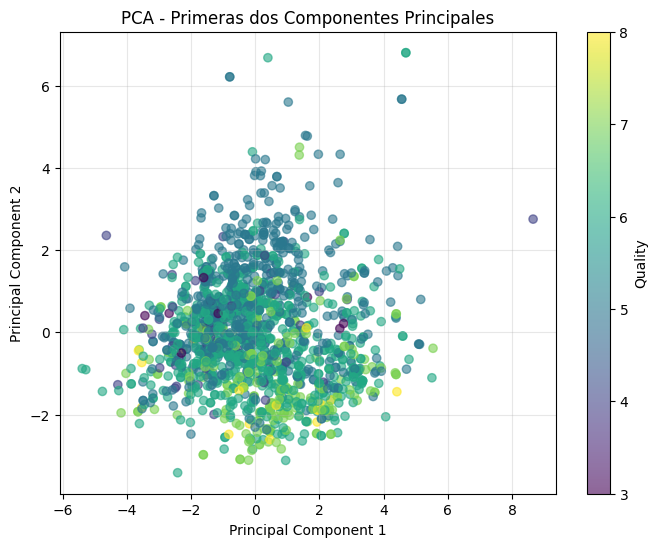

In [6]:
# Reducir el dataset a 7 componentes principales
pca_7 = PCA(n_components=7)
X_reduced = pca_7.fit_transform(X_scaled)

# Visualización de las primeras dos componentes principales
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis', alpha=0.6)
plt.colorbar(label='Quality')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - Primeras dos Componentes Principales')
plt.grid(alpha=0.3)
plt.show()


In [8]:
# Configuración de validación cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Definir modelos a comparar
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

# Métricas de evaluación
results = {}
for model_name, model in models.items():
    scores = cross_val_score(model, X_reduced, y, cv=cv, scoring='accuracy')
    results[model_name] = {
        "Mean Accuracy": scores.mean(),
        "Std Accuracy": scores.std()
    }

results

{'Logistic Regression': {'Mean Accuracy': 0.5784874608150471,
  'Std Accuracy': 0.009506274841901955},
 'Decision Tree': {'Mean Accuracy': 0.606610501567398,
  'Std Accuracy': 0.020668992417580582},
 'Random Forest': {'Mean Accuracy': 0.6735364420062695,
  'Std Accuracy': 0.01988428325050953},
 'SVM': {'Mean Accuracy': 0.6103918495297805,
  'Std Accuracy': 0.026410716009025077}}

***
### Hiperparametros

In [10]:
# Seleccionar Random Forest como modelo base para ajuste de hiperparámetros
rf_model = RandomForestClassifier(random_state=42)

# Configuración de hiperparámetros para búsqueda
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='accuracy',
    n_jobs=-1
)

# Ejecutar la búsqueda de hiperparámetros
grid_search.fit(X_reduced, y)

# Mejor modelo y parámetros
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_model, best_params, best_score


(RandomForestClassifier(min_samples_leaf=2, n_estimators=200, random_state=42),
 {'max_depth': None,
  'min_samples_leaf': 2,
  'min_samples_split': 2,
  'n_estimators': 200},
 0.6823099529780564)

***
### GENERAR INFORME


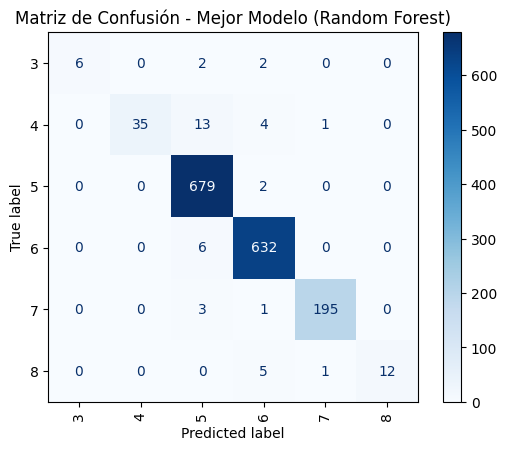

'              precision    recall  f1-score   support\n\n           3       1.00      0.60      0.75        10\n           4       1.00      0.66      0.80        53\n           5       0.97      1.00      0.98       681\n           6       0.98      0.99      0.98       638\n           7       0.99      0.98      0.98       199\n           8       1.00      0.67      0.80        18\n\n    accuracy                           0.97      1599\n   macro avg       0.99      0.82      0.88      1599\nweighted avg       0.98      0.97      0.97      1599\n'

In [11]:
# Generar reporte de clasificación
from sklearn.metrics import ConfusionMatrixDisplay


classification_rep = classification_report(y, best_model.predict(X_reduced), target_names=[str(c) for c in sorted(y.unique())])

# Crear matriz de confusión
conf_matrix = confusion_matrix(y, best_model.predict(X_reduced))
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=sorted(y.unique()))

# Visualizar matriz de confusión
disp.plot(cmap="Blues", xticks_rotation="vertical")
plt.title("Matriz de Confusión - Mejor Modelo (Random Forest)")
plt.show()

# Reporte de clasificación
classification_rep


Reporte de clasificación del mejor modelo (Random Forest)
- Métricas generales:
  - Precisión global (accuracy): 97%
  - Macro promedio:
   - Precisión (precision): 99%
   - Recall: 82%
   - F1-score: 88%
  - Promedio ponderado:
   - Precisión: 98%
   - Recall: 97%
   - F1-score: 97%
- Desglose por clase:
  - Las clases más comunes (5, 6, y 7) tienen un excelente rendimiento con precisión, recall y F1-score cercanos al 98-99%.
  - Las clases menos representadas (3, 4, y 8) muestran un rendimiento inferior, especialmente en recall:
   - Clase 3: Recall de 60%.
   - Clase 4: Recall de 66%.
   - Clase 8: Recall de 67%.

Conclusión del mejor modelo
 - Fortalezas:
El modelo tiene un excelente rendimiento en las clases mayoritarias, lo cual es crucial para la precisión global.
La precisión y el F1-score ponderados son muy altos, lo que indica un modelo confiable.

 - Debilidades:
Las clases minoritarias no se predicen tan bien, posiblemente debido al desequilibrio en el dataset.